<a href="https://colab.research.google.com/github/andikaryan/Analisys-of-data-video-games-sales/blob/main/Analisys_of_Data_cleaning_group_17_RevoU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import module



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# Import dataset

In [ ]:
url = "https://drive.google.com/file/d/1z5tyFq-p_JhuDZm5gGNukwX9Gz__9HRP/view?usp=sharing"
output = 'dataset_capstone_project.csv'
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1z5tyFq-p_JhuDZm5gGNukwX9Gz__9HRP
To: /content/dataset_capstone_project.csv
100%|██████████| 1.52M/1.52M [00:00<00:00, 11.7MB/s]


'dataset_capstone_project.csv'

In [ ]:
game = pd.read_csv("dataset_capstone_project.csv")
game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


Copy dataframe

In [ ]:
game_raw = game.copy()

# Cleaning data

Cek data null

In [ ]:
game.isnull().sum()

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

Cek data duplicate

In [ ]:
game.duplicated().sum()

0

Menghapus data null

In [ ]:
game = game.drop('Critic_Score', axis=1)
game = game.drop('Critic_Count', axis=1)
game = game.drop('User_Score', axis=1)
game = game.drop('User_Count', axis=1)
game = game.drop('Rating', axis=1)

In [ ]:
game.isnull().sum()

Name               0
Platform           0
Year_of_Release    8
Genre              0
Publisher          1
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [ ]:
game = game.drop(game[(game["Year_of_Release"].isnull())].index)
game = game.drop(game[(game["Publisher"].isnull())].index)

In [ ]:
game.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

Mengubah data type Year_of_Release dari float ke int


In [ ]:
game['Year_of_Release'] = game['Year_of_Release'].astype('int64')

Cek berapa data yang hilang

In [ ]:
jumlah_baris_asli = len(game_raw)

jumlah_baris_setelah_pembersihan = len(game)

# Hitung jumlah data yang hilang (data yang dihapus selama pembersihan)
data_hilang = jumlah_baris_asli - jumlah_baris_setelah_pembersihan

# Hitung persentase data yang hilang
persentase_hilang = (data_hilang / jumlah_baris_asli) * 100

# Tampilkan hasil perbandingan
print("Jumlah baris data asli:", jumlah_baris_asli)
print("Jumlah baris data setelah pembersihan:", jumlah_baris_setelah_pembersihan)
print("Data yang hilang:", data_hilang)
print("Persentase data yang hilang:", persentase_hilang, "%")

Jumlah baris data asli: 17416
Jumlah baris data setelah pembersihan: 17408
Data yang hilang: 8
Persentase data yang hilang: 0.045934772622875514 %


In [ ]:
game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78
4,Pokemon Red/Pokemon Blue,G,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01
17412,Fashion Designer: Style Icon,DS,2007,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01


In [ ]:
publishers = ['Electronic Arts', 'Activision', 'Ubisoft', 'Namco Bandai Games', 'Konami Digital Entertainment']
game_clean = game[game['Publisher'].isin(publishers)& ((game['Year_of_Release'] >= 2010) & (game['Year_of_Release'] <= 2017))]
game_clean

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
30,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.08,5.95,0.36,2.41,14.80
31,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.06,4.26,0.13,1.33,14.77
32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.73,3.70,0.11,1.13,14.67
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.73,0.65,2.42,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.26,0.07,1.12,13.69
...,...,...,...,...,...,...,...,...,...,...
17264,"Utatte Touch, Utouchi!!",DS,2010,Misc,Konami Digital Entertainment,0.00,0.00,0.01,0.00,0.01
17277,Winx Club: Saving Alfea,DS,2014,Action,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
17349,The Mighty Quest for Epic Loot,PC,2013,Role-Playing,Ubisoft,0.00,0.00,0.00,0.00,0.01
17374,Dawn of Discovery: Venice,PC,2010,Simulation,Ubisoft,0.00,0.00,0.00,0.00,0.01


In [ ]:
game_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 30 to 17387
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1758 non-null   object 
 1   Platform         1758 non-null   object 
 2   Year_of_Release  1758 non-null   int64  
 3   Genre            1758 non-null   object 
 4   Publisher        1758 non-null   object 
 5   NA_Sales         1758 non-null   float64
 6   EU_Sales         1758 non-null   float64
 7   JP_Sales         1758 non-null   float64
 8   Other_Sales      1758 non-null   float64
 9   Global_Sales     1758 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 151.1+ KB


In [ ]:
game_clean.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

Mengecek typo

In [ ]:
platform_counts = game_clean['Platform'].value_counts()
print("\nPlatform Value Counts:")
print(platform_counts)


Platform Value Counts:
PS3     341
X360    281
3DS     166
Wii     160
PC      156
DS      150
PS4     131
PSP     123
XOne    102
PSV      81
WiiU     54
PS2      13
Name: Platform, dtype: int64


In [ ]:
genre_counts = game_clean['Genre'].value_counts()
print("\nGenre Value Counts:")
print(genre_counts)


Genre Value Counts:
Action          534
Sports          293
Misc            211
Shooter         171
Role-Playing    128
Simulation       76
Racing           76
Fighting         76
Adventure        75
Strategy         59
Platform         49
Puzzle           10
Name: Genre, dtype: int64


In [ ]:
publisher_counts = game_clean['Publisher'].value_counts()
print("\nPublisher Value Counts:")
print(publisher_counts)


Publisher Value Counts:
Namco Bandai Games              497
Activision                      361
Electronic Arts                 351
Ubisoft                         338
Konami Digital Entertainment    211
Name: Publisher, dtype: int64


Visualisasi total global sales per platform

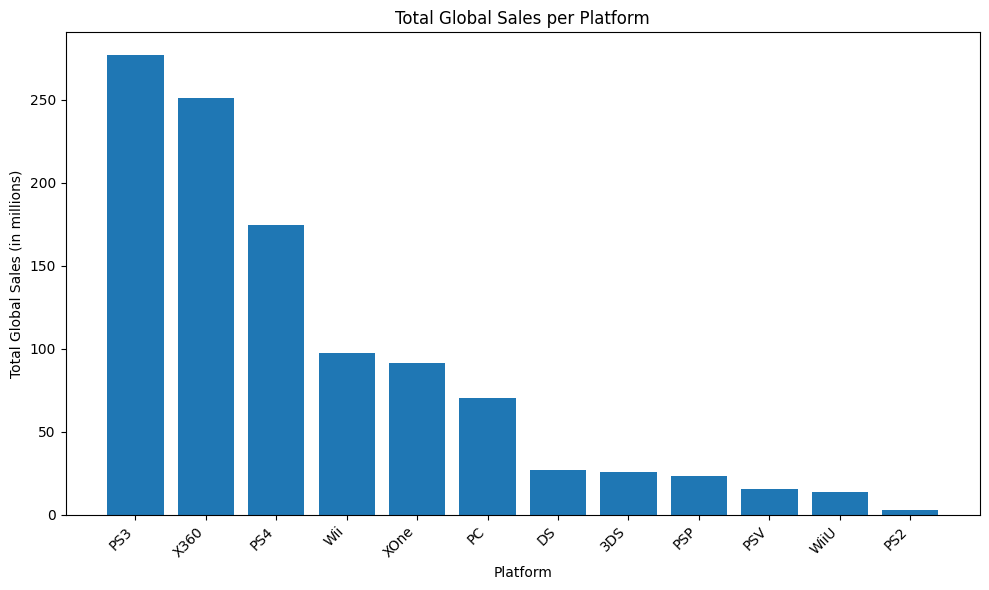

In [ ]:
# Group data by platform and sum global sales
platform_sales = game_clean.groupby('Platform')['Global_Sales'].sum().reset_index()

# Sort data by global sales in descending order
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(platform_sales['Platform'], platform_sales['Global_Sales'])
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (in millions)')
plt.title('Total Global Sales per Platform')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan chart
plt.show()

Visualisasi total global sale per genre

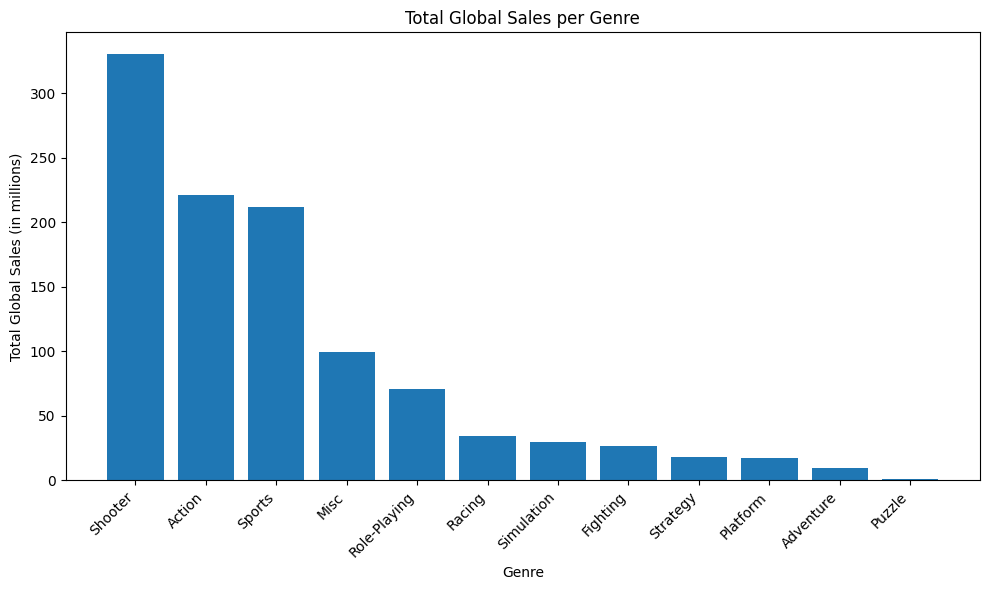

In [ ]:
# Group data by genre and sum global sales
genre_sales = game_clean.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sort data by global sales in descending order
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(genre_sales['Genre'], genre_sales['Global_Sales'])
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (in millions)')
plt.title('Total Global Sales per Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan chart
plt.show()

In [ ]:
# Hitung total global sales
total_global_sales = game_clean['Global_Sales'].sum()

print(f'Total Global Sales: {total_global_sales} million')


Total Global Sales: 1070.48 million


1. Visualisasi game yang memiliki penjualan global tertinggi (total global sales) berdasarkan genre

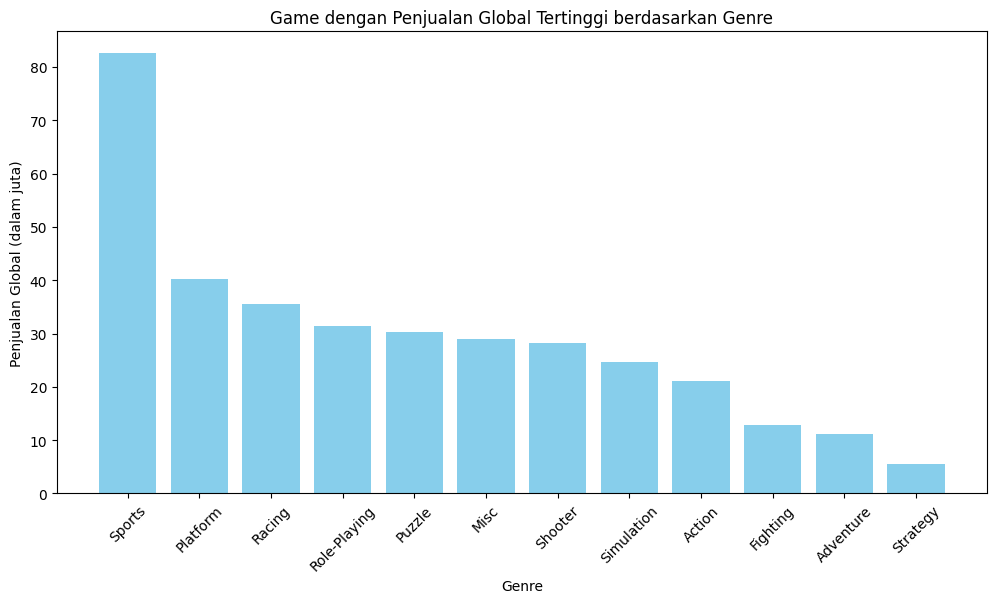

Game dengan penjualan global tertinggi berdasarkan genre:
            Genre                                Name  Global_Sales
0          Sports                          Wii Sports         82.54
1        Platform                   Super Mario Bros.         40.24
2          Racing                      Mario Kart Wii         35.57
4    Role-Playing            Pokemon Red/Pokemon Blue         31.37
5          Puzzle                              Tetris         30.26
7            Misc                            Wii Play         28.92
9         Shooter                           Duck Hunt         28.31
10     Simulation                          Nintendogs         24.67
16         Action                  Grand Theft Auto V         21.12
41       Fighting             Super Smash Bros. Brawl         12.87
51      Adventure  Super Mario Land 2: 6 Golden Coins         11.18
170      Strategy                     Pokemon Stadium          5.45


In [ ]:
# Game yang memiliki penjualan global tertinggi berdasarkan genre
top_selling_games_by_genre = game.loc[game.groupby('Genre')['Global_Sales'].idxmax()]

# Sort data in descending order
top_selling_games_by_genre = top_selling_games_by_genre.sort_values(by='Global_Sales', ascending=False)

# Visualisasi 1: Bar chart penjualan global tertinggi berdasarkan genre
plt.figure(figsize=(12, 6))
plt.bar(top_selling_games_by_genre['Genre'], top_selling_games_by_genre['Global_Sales'], color='skyblue')
plt.title('Game dengan Penjualan Global Tertinggi berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Penjualan Global (dalam juta)')
plt.xticks(rotation=45)
plt.show()

# Menampilkan hasil
print("Game dengan penjualan global tertinggi berdasarkan genre:")
print(top_selling_games_by_genre[['Genre', 'Name', 'Global_Sales']])

2. Visualisasi tahun perilisan game yang mencapai kesuksesan terbesar

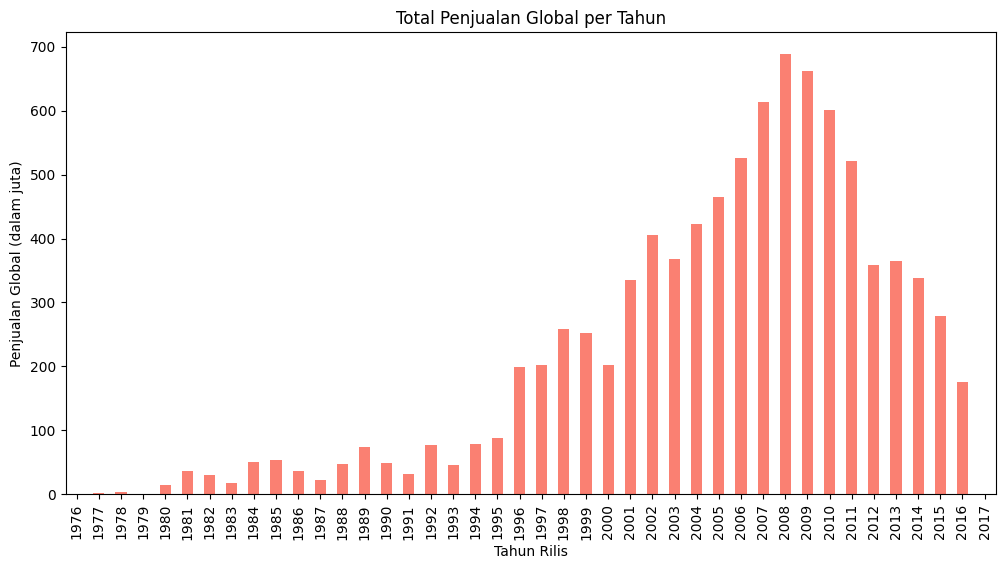

Tahun perilisan game yang mencapai kesuksesan terbesar
Tahun: 2008


In [ ]:
# Tahun perilisan game mencapai kesuksesan terbesar
most_successful_year = game.groupby('Year_of_Release')['Global_Sales'].sum().idxmax()

# Visualisasi: Bar chart total penjualan global per tahun
plt.figure(figsize=(12, 6))
game.groupby('Year_of_Release')['Global_Sales'].sum().plot(kind='bar', color='salmon')
plt.title('Total Penjualan Global per Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Penjualan Global (dalam juta)')
plt.show()

# Menampilkan hasil
print("Tahun perilisan game yang mencapai kesuksesan terbesar")
print("Tahun:", most_successful_year)

In [ ]:
game_clean.to_csv("game_clean.csv", index=False)